<a href="https://colab.research.google.com/github/SuyashKubade/Hate-and-Offensive-Speech-Detection-in-Marathi/blob/main/Evaluation_of_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the tensorflow-text library version 2.13.*
!pip install "tensorflow-text==2.13.*"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the necessary libraries:

#The main TensorFlow library.
import tensorflow as tf

#The library for accessing pre-trained models from TensorFlow Hub.
import tensorflow_hub as hub

#The library for working with text data in TensorFlow.
import tensorflow_text as tf_text

In [ ]:
from tensorflow.keras.models import load_model

model_loaded = load_model('/content/drive/MyDrive/my_model2')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Load your CSV file into a DataFrame
df = pd.read_csv('/content/hate_bin_test.xlsx - Sheet1.csv')

In [ ]:
# Assuming your CSV has two columns: 'text' and 'label', adjust accordingly
texts = df['text']
# Define the mapping dictionary
label_mapping = {"HOF": 1, "NOT": 0}

# Apply the mapping to the label column
df['label'] = df['label'].map(label_mapping)
labels = df['label']

# Perform your machine learning tasks and obtain predictions
# For example, if you have predictions already:
predicted_labels = model_loaded.predict(texts)

118/118 [==============================] - 7427s 63s/step


In [ ]:
import numpy as np

# Define a threshold
threshold = 0.61

# Convert contiguous output to binary
binary_predicted_labels = [1 if x >= threshold else 0 for x in predicted_labels]

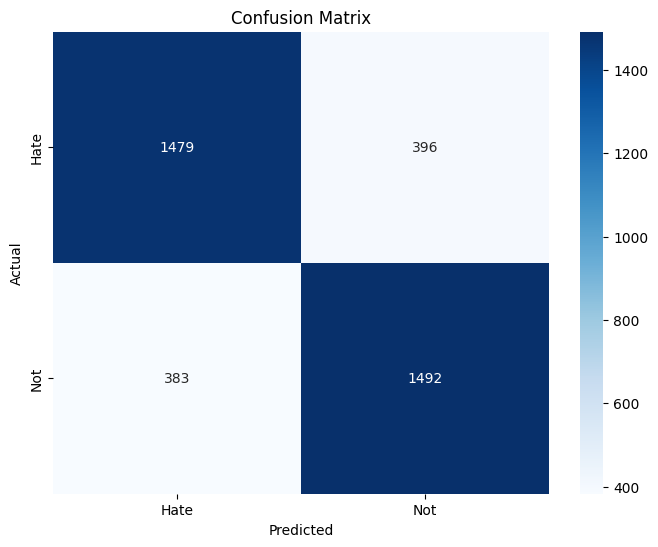

In [ ]:
# Example: Generating a confusion matrix
conf_matrix = confusion_matrix(labels, binary_predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
label ={'Hate', 'Not'}
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate F1 score
f1 = f1_score(labels, binary_predicted_labels)
print(f"F1 Score: {f1:.2f}")

# Calculate precision
precision = precision_score(labels, binary_predicted_labels)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(labels, binary_predicted_labels)
print(f"Recall: {recall:.2f}")

F1 Score: 0.79
Precision: 0.78
Recall: 0.81


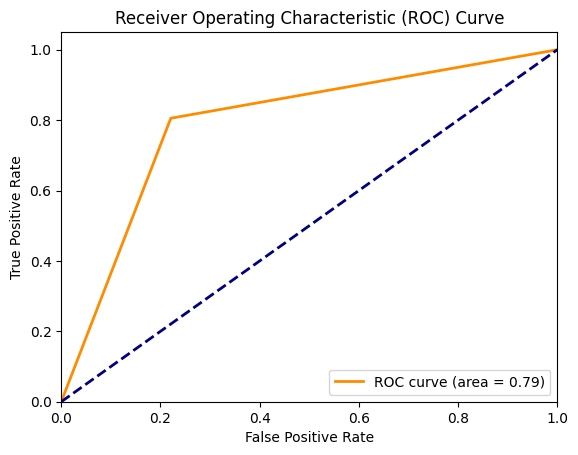

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are your true labels and predicted probabilities respectively

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(labels, binary_predicted_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
